(18,)
[ 149.75369  249.7561   349.75845  449.76077  549.76303  649.76526
  749.76744  849.76959  949.77169 1049.77376 1149.77578 1249.77778
 1349.77974 1449.78166 1549.78355 1649.78541]
[3743.89775 3687.11737 2363.08578 1733.47929 1567.93204 1343.98776
 1273.02758 1256.09897 1049.62286 1193.41037  545.94211  922.44264
  790.73304  378.54474  482.90169  410.3354 ]


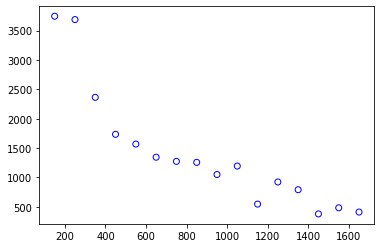

In [47]:
hlist2 = hlist[1:]
dlane2 = dlane[1:]
print(np.shape(hlist))
H_eff = 1/(hlist2+10000)
H_new = np.zeros(16)
slope = np.zeros(16)
H_new2 = np.arange(50,1800)

for i in np.arange(16):
        H_new[i] = 1/((H_eff[i+1]+H_eff[i])/2)-10000
        slope[i] = (dlane2[i+1]-dlane2[i])/(H_eff[i+1]-H_eff[i])
print(H_new)
print(slope)
plt.scatter(H_new,slope,facecolors='none',edgecolors='b')    


In [125]:
# Hall Bar
import scipy.constants as const
import numpy as np

t_fm = 2
t_hm = 4.24
w = 5
ms = 1000
rho_fm = 50
rho_hm = 150
I = 10 #mA

Oe_per_I = ((rho_hm/t_hm)/(rho_fm/t_fm+rho_hm/t_hm)*(I/1000)/(w*1e-6)/(t_hm*1e-9))*(t_hm*1e-9)/2/(I)*0.012566
hi = 0.0555/(5)/I*10000#-Oe_per_I
#DL: slope/Rahe/Iappl*(Oe/T)
#FL: slope/(2Rphe)/Iappl*(Oe/T)

eff = 2*const.e*ms*w*t_fm*t_hm*10**(-21)/const.hbar*0.1*hi*(rho_fm*t_hm+rho_hm*t_fm)/(rho_fm*t_hm)#*(2/np.pi)
print(hi)
print(eff)

11.100000000000001
0.34537203039135234


In [34]:
#Oersted field H = 1/2 J*d
t_fm = 2
t_hm = 7.16
rho_fm = 190
rho_hm = 90
w=5
I = 10
Oe_per_I = ((rho_hm/t_hm)/(rho_fm/t_fm+rho_hm/t_hm)*(I/1000)/(w*1e-6)/(t_hm*1e-9))*(t_hm*1e-9)/2/(I)
print(Oe_per_I*0.012566)

0.14683718514671515


In [334]:
#If insertion exist
t1, t2 = 0.8, 6
r1, r2 = 130, 90
rho_all=(t1+t2)/(t1/r1+t2/r2)
rho_all

93.38028169014085

In [3]:
# Pillar
import scipy.constants as const
import numpy as np

t_fm = 2
t_hm = 4
w_channel = 1
A_pillar = 0.5
l_pillar = np.sqrt(A_pillar)
ms = 1000
rho_fm = 190
rho_hm = 200
hi = 6.87

eff = 2*const.e*ms*w_channel*t_fm*t_hm*10**(-21)/const.hbar*0.1*hi*(rho_fm*t_hm*w_channel+rho_hm*t_fm*l_pillar)/(rho_fm*t_hm*w_channel)#*(2/np.pi)
print(eff)

0.022914805446398057


['800.0Oe', '0.15mA', '80506.55Ohm', '2022-10-31-203548.csv']
['800.0Oe', '0.15mA', '83122.81Ohm', '2022-10-31-204005.csv']
['1000.0Oe', '0.15mA', '83175.26Ohm', '2022-10-31-203631.csv']
['1000.0Oe', '0.15mA', '83296.19Ohm', '2022-10-31-204047.csv']
['1300.0Oe', '0.15mA', '83010.48Ohm', '2022-10-31-204130.csv']
['1300.0Oe', '0.15mA', '83187.42Ohm', '2022-10-31-203713.csv']
['1500.0Oe', '0.15mA', '83345.0Ohm', '2022-10-31-203757.csv']
['1500.0Oe', '0.15mA', '83359.12Ohm', '2022-10-31-204212.csv']
['1700.0Oe', '0.15mA', '83034.79Ohm', '2022-10-31-204255.csv']
['1700.0Oe', '0.15mA', '83183.15Ohm', '2022-10-31-203840.csv']
['1900.0Oe', '0.15mA', '83111.15Ohm', '2022-10-31-203922.csv']
['1900.0Oe', '0.15mA', '83271.14Ohm', '2022-10-31-204338.csv']
H	 [ 800.  800. 1000. 1000. 1300. 1300. 1500. 1500. 1700. 1700. 1900. 1900.]
DLANE	 [-0.08862  0.01145  0.01181 -0.00105 -0.01187 -0.03307 -0.02226 -0.009
 -0.00988 -0.01021  0.00139 -0.04509]
FLOe	 [ 0.0399  -0.01587 -0.01379 -0.02887  0.01793  0

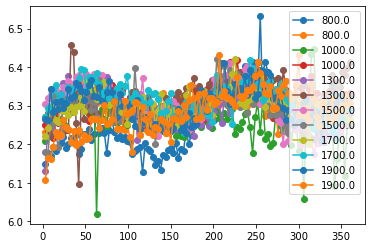

In [451]:
# input users parameters

dir_path = r'C:\Users\doc\Desktop\Chia-Chin\221031\Ti1.5CFB3' # path to directory
#voltage = '5.0V'    # Applied Voltage
mode = '2nd'
#field = '1000'
samplename='_'

import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit

xyfiles = sorted(glob.glob(os.path.join(dir_path, '*'+samplename+'*')),\
                 key=lambda path: float(path.split('_')[-4].split('O')[0])) # use os.path.join to make os independent

num = len(xyfiles)
#print(xyfiles)

def sech(x,a,b,c,d,phase):
    return a*np.cos((x+phase)*np.pi/180)+b*(2*(np.cos((x+phase)*np.pi/180))**3-np.cos((x+phase)*np.pi/180))+c*np.sin((x+phase)*np.pi/90)+d

def firh(x,a,c,phase):
    return a*np.sin((x+phase)*np.pi/90)+c

def dlanefit(x,a,b,c):
    return a*(1/(x+b))+c

def floefit(x,a,c):
    return a/x+c

dlane = np.array([])
floe = np.array([])
pne = np.array([])
off = np.array([])
phe = np.array([])
hlist = np.array([])
rawdata = []


if mode == '2nd':
    for i in np.arange(num):
        df = pd.read_csv(xyfiles[i],sep=',',skiprows=6)
        print(xyfiles[i].split('_')[-4:])
        k=5
        seco,secc = curve_fit(sech,df.values[:,1],df.values[:,k])
        dlane = np.append(dlane,seco[0])
        floe = np.append(floe,seco[1])
        pne = np.append(pne,seco[2])
        off = np.append(off,seco[3])
        hlist = np.append(hlist,float(xyfiles[i].split('_')[-4].split('O')[0]))
        plt.plot(df.values[:,1],df.values[:,k],'o-',label=hlist[-1])
        if i==0:
            rawdata.append(df.values[:,1])
        rawdata.append(df.values[:,k])
       
        
if mode == '1st':
    for i in np.arange(num):
        df = pd.read_csv(xyfiles[i],sep=',',skiprows=6)
        firo,firc = curve_fit(firh,df.values[:,1],df.values[:,4])
        phe = np.append(phe,firo[0])
plt.legend()
np.set_printoptions(precision=5)
print('H\t',hlist)
print('DLANE\t',dlane)
print('FLOe\t',floe)
print('PNE\t',pne)
print('PHE\t',phe)
OUTPUT = np.array([hlist,dlane,floe,pne]).transpose()
OUTPUT_raw = np.array(rawdata).transpose()
#print(str(hlist)[1:-2].replace('.',','))
#R_AHE=-4.17*0.9
#print('RPHE\t',xyfir)

DLslope= -0.06877 
err= 0.2844104568958585


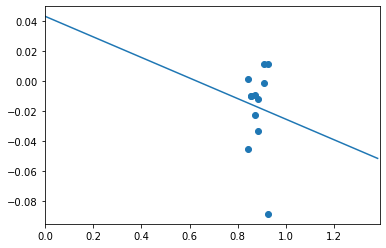

In [452]:
Hd = 10000
Beff = (np.array(hlist)+Hd)/10000
#print(1/Beff)
#mx+b
m,cov=np.polyfit(1/Beff,dlane,1,cov=True)
print('DLslope=',round(m[0],5),'\nerr=',np.sqrt(np.diag(cov)[0]))
linfit=np.poly1d((m[0],m[1]))

x=np.arange(0,1.5*max(1/Beff),0.01)
plt.scatter(1/Beff,dlane)
plt.plot(x,linfit(x))
plt.xlim(0,1.5*max(1/Beff))
#plt.ylim(-1.5*min(linfit(x)),1.5*max(linfit(x)))
#print(m)

OUTPUT = np.array([hlist,pne,1/Beff,dlane,10000/np.array(hlist),floe]).transpose()
OUTPUT_raw = np.array(rawdata).transpose()

In [449]:
name='Pt1 1mA'
np.savetxt(name+'.csv',OUTPUT,delimiter=',',header='H,PNE,1/Beff,DLANE,1/Bext,FLOe')
np.savetxt('cur_'+name+'.csv',OUTPUT_raw,delimiter=',',header='H,'+str(hlist)[1:-2].replace('.','Oe,')+'Oe')

No handles with labels found to put in legend.


[]
H	 []
DLANE	 []
FLOe	 []
PNE	 []
PHE	 []


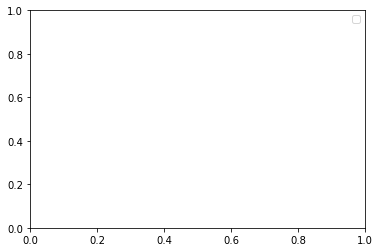

In [289]:
# input users parameters

dir_path = r'/Users/didierjim/Documents/SCREAM/_Measurement/2022-09-ITRI/GMW/22100/13 ac/I' # path to directory
#voltage = '5.0V'    # Applied Voltage
mode = '2nd'
#field = '1000'
samplename='_2nd'

import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit

xyfiles = sorted(glob.glob(os.path.join(dir_path, '*'+samplename+'*')),\
                 key=lambda path: float(path.split('_')[-4].split('O')[0])) # use os.path.join to make os independent

num = len(xyfiles)
print(xyfiles)

def sech(x,a,b,c,d,phase):
    return a*np.cos((x+phase)*np.pi/180)+b*(2*(np.cos((x+phase)*np.pi/180))**3-np.cos((x+phase)*np.pi/180))+c*np.sin((x+phase)*np.pi/90)+d

def firh(x,a,c,phase):
    return a*np.sin((x+phase)*np.pi/90)+c

def dlanefit(x,a,b,c):
    return a*(1/(x+b))+c

def floefit(x,a,c):
    return a/x+c

dlane = np.array([])
floe = np.array([])
pne = np.array([])
off = np.array([])
phe = np.array([])
hlist = np.array([])
rawdata = []


if mode == '2nd':
    for i in np.arange(num):
        df = pd.read_csv(xyfiles[i],sep=' ',skiprows=7)
        seco,secc = curve_fit(sech,df.values[:,1],df.values[:,2])
        dlane = np.append(dlane,seco[0])
        floe = np.append(floe,seco[1])
        pne = np.append(pne,seco[2])
        off = np.append(off,seco[3])
        #hlist = np.append(hlist,float(xyfiles[i].split('_')[-4].split('O')[0]))
        hlist = np.append(hlist,float(xyfiles[i].split('_')[-2].split('m')[0]))
        plt.plot(df.values[:,1],df.values[:,2],'-',label=xyfiles[i].split('_')[-1].split('-')[-1])
        if i==0:
            rawdata.append(df.values[:,1])
        rawdata.append(df.values[:,2])
       
        
if mode == '1st':
    for i in np.arange(num):
        df = pd.read_csv(xyfiles[i],sep=',',skiprows=6)
        firo,firc = curve_fit(firh,df.values[:,1],df.values[:,4])
        phe = np.append(phe,firo[0])
plt.legend()
np.set_printoptions(precision=5)
print('H\t',hlist)
print('DLANE\t',dlane)
print('FLOe\t',floe)
print('PNE\t',pne)
print('PHE\t',phe)
OUTPUT = np.array([hlist,dlane,floe,pne]).transpose()
OUTPUT_raw = np.array(rawdata).transpose()
#print(str(hlist)[1:-2].replace('.',','))
#R_AHE=-4.17*0.9
#print('RPHE\t',xyfir)

In [67]:
name='13-5V-R1.19'
np.savetxt(name+'.csv',OUTPUT,delimiter=',',header='H,DLANE,FLOe,PNE')
np.savetxt('cur_'+name+'.csv',OUTPUT_raw,delimiter=',',header='H,'+str(hlist)[1:-2].replace('.','Oe,'))

In [6]:
v_num = 5
h_num = 6
H = np.array([])
V = np.array([])

for i in np.arange(num):
    h = float(xyfiles[i].split('_')[2].split('O')[0])
    v = float(xyfiles[i].split('_')[4].split('V')[0])
    while h not in H:
        H = np.append(H,h)
    while v not in V:
        V = np.append(V,v)
        
print(V[0],'~',V[-1],'volt')
print('Step =', (V[-1]-V[0])/(v_num-1),'volt')
        
for i in np.arange(h_num):
    data = np.zeros((61,v_num+1))
    dlane = np.array([])
    floe = np.array([])
    pne = np.array([])
    off = np.array([])
    phe = np.array([])
    pse = np.array([])
    for j in np.arange(1,v_num+1):
        if j == 1:
            data[:,:2] = pd.read_csv(xyfiles[i*h_num+j-(i+1)],sep=' ',skiprows=8).values[:,1:3]
            seco,secc = curve_fit(sech,data[:,0],data[:,1])
            dlane = np.append(dlane,seco[0])
            floe = np.append(floe,seco[1])
            pne = np.append(pne,seco[2])
            off = np.append(off,seco[3])
            pse = np.append(pse,seco[4])
        else:
            data[:,j] = pd.read_csv(xyfiles[i*h_num+j-(i+1)],sep=' ',skiprows=8).values[:,2]
            seco,secc = curve_fit(sech,data[:,0],data[:,j])
            dlane = np.append(dlane,seco[0])
            floe = np.append(floe,seco[1])
            pne = np.append(pne,seco[2])
            off = np.append(off,seco[3])
            pse = np.append(pse,seco[4])
            
    print('Applied Field:', H[i], 'Oe')
    plt.figure(figsize=(8,5))
    plt.xlabel('Applied Field Angle (deg)')
    plt.ylabel('$R^{2\omega}_{xy}\ (m\Omega)$')
    for j in np.arange(v_num):
        plt.plot(data[:,0],data[:,j+1],'o',markerfacecolor='white',markeredgewidth=1.5)
        plt.plot(np.arange(360),sech(np.arange(360),dlane[j],floe[j],pne[j],off[j],pse[j]),c='k',linewidth=2.5)
    plt.show()
    


ValueError: could not convert string to float: 'xyscan'

In [6]:
import itertools
for i, j in itertools.product(range(0,5), range(0,2)):
    

TypeError: list expected at most 1 arguments, got 2

In [14]:
z = itertools.product(range(0,5), range(0,2))
for i, j in z:
    print(i,j)
#for i, j in zip(range(0,5), range(0,2)):
    #print(i,j)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
